## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 62s 0us/step


In [3]:
from keras.utils import to_categorical
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,  Dropout, Flatten, Dense, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.optimizers import Adam

In [10]:
#param setting
epochs=30
batch_size = 300


data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

model = Sequential()
model.add(Conv2D(32, (3, 3),  input_shape=x_train.shape[1:], padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)       

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model.fit_generator(data_generator.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=int(len(x_train)/batch_size), 
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1)
score = model.evaluate(x_test, y_test)
print(score)

Epoch 1/30
166/166 [==============================] - 119s 715ms/step - loss: 1.8473 - accuracy: 0.3466 - val_loss: 6.6410 - val_accuracy: 0.1784
Epoch 2/30
166/166 [==============================] - 116s 701ms/step - loss: 1.5049 - accuracy: 0.4549 - val_loss: 7.1600 - val_accuracy: 0.1493
Epoch 3/30
166/166 [==============================] - 117s 702ms/step - loss: 1.3618 - accuracy: 0.5090 - val_loss: 3.4620 - val_accuracy: 0.3156
Epoch 4/30
166/166 [==============================] - 116s 701ms/step - loss: 1.2698 - accuracy: 0.5427 - val_loss: 2.5284 - val_accuracy: 0.3749
Epoch 5/30
166/166 [==============================] - 116s 698ms/step - loss: 1.2030 - accuracy: 0.5698 - val_loss: 1.3699 - val_accuracy: 0.5816
Epoch 6/30
166/166 [==============================] - 116s 697ms/step - loss: 1.1431 - accuracy: 0.5927 - val_loss: 1.9409 - val_accuracy: 0.4739
Epoch 7/30
166/166 [==============================] - 116s 697ms/step - loss: 1.1077 - accuracy: 0.6070 - val_loss: 1.3315 -

KeyError: 'acc'

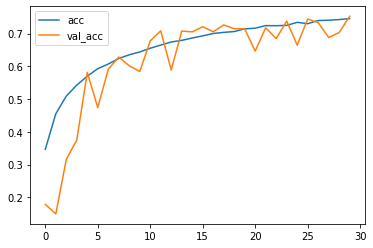

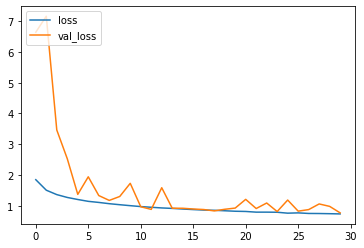

In [12]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(loc=2)
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc=2)